In [2]:
!pip install mlrose-hiive

     |████████████████████████████████| 51kB 1.5MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.1.3-cp36-none-any.whl size=96601 sha256=019d1198b6de531078c0bc3b737eeb4d7a17bd65b96fce6455760450c9ef8a1f
  Stored in directory: /root/.cache/pip/wheels/ee/ef/8b/941402c2014649279f68a1ed4a37b4d15142dfb9c7e4a6b7ac
Successfully built mlrose-hiive


In [1]:
from mlrose_hiive import NeuralNetwork
from sklearn.metrics import accuracy_score
import csv
import pandas as pd
import time
import json

In [16]:
from mlrose_hiive.algorithms.decay import GeomDecay

def run_neural_network_sa(X_train, y_train, X_test, y_test):
    hidden_nodes = [100, 50, 100]
    results = {}

    for decay in [0.99, 0.95, 0.75, 0.5, 0.4]:
        print("Decay", decay)
        schedule = GeomDecay(init_temp=1, decay=decay)
        start = time.time()
        model = NeuralNetwork(hidden_nodes=hidden_nodes, schedule=schedule, algorithm='simulated_annealing', 
                              max_iters=5000, random_state=7, curve=True)
        model.fit(X_train, y_train)
        end = time.time()
        y_act = model.predict(X_test)
        results[decay] = {
            'loss': model.loss, 
            'curve': model.fitness_curve.tolist(),
            'accuracy': accuracy_score(y_act, y_test),
            'time': end-start
        }
        print(results[decay])
    with open("SA.json", "w+") as f:
        json.dump(results, f, indent=4)



In [17]:
from scipy.io.arff import loadarff 
from sklearn.model_selection import train_test_split

raw_data = loadarff('Training Dataset.arff')
ph_data = pd.DataFrame(raw_data[0])

for var in ph_data.columns.values:
    ph_data[var] = pd.Categorical(ph_data[var])
    ph_data[var] = ph_data[var].cat.codes


y = ph_data.Result.values
X = ph_data.drop(['Result'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

run_neural_network_sa(X_train, y_train, X_test, y_test)

Decay 0.99
{'loss': 4.571354979218782, 'curve': [17.692170371459714, 17.692184947078808, 17.69109896221163, 17.69119719115275, 17.69130417973275, 17.69130417973275, 17.66506483410474, 17.636626160341724, 17.6364195930701, 17.6364195930701, 17.63885751445512, 17.63885751445512, 17.632135664724565, 17.632148593822627, 17.632148593822627, 17.63229496040506, 17.632204911711188, 17.656348903042414, 17.658352895027456, 17.65712360012775, 17.657591405182497, 17.656240524604986, 17.656270361673833, 17.656180596797235, 17.650956174406844, 17.650956174406844, 17.65094992245553, 17.653730037231014, 17.65354005733015, 17.63801591445441, 17.63783729828058, 17.48244299525926, 17.450407413762328, 17.46125732301822, 17.502660357094275, 17.503320947121242, 17.504102880766695, 17.498764543013117, 17.4106131122381, 17.392266880470427, 17.387793717947993, 17.387872497075186, 17.387971263718484, 17.387971263718484, 17.379553565027397, 17.380148938643217, 17.3798103150682, 17.3798103150682, 17.3798103150682

{'loss': 4.0698480250352365, 'curve': [17.692170371459714, 17.692184947078808, 17.69109896221163, 17.69119719115275, 17.69130417973275, 17.69130417973275, 17.66506483410474, 17.636626160341724, 17.6364195930701, 17.6364195930701, 17.63885751445512, 17.63885751445512, 17.632135664724565, 17.632148593822627, 17.632148593822627, 17.63229496040506, 17.632204911711188, 17.656348903042414, 17.658352895027456, 17.65712360012775, 17.657591405182497, 17.656240524604986, 17.656270361673833, 17.656180596797235, 17.650956174406844, 17.650956174406844, 17.65094992245553, 17.653730037231014, 17.65354005733015, 17.63801591445441, 17.63783729828058, 17.48244299525926, 17.450407413762328, 17.46125732301822, 17.502660357094275, 17.503320947121242, 17.504102880766695, 17.498764543013117, 17.4106131122381, 17.392266880470427, 17.387793717947993, 17.387872497075186, 17.387971263718484, 17.387971263718484, 17.379553565027397, 17.380148938643217, 17.3798103150682, 17.3798103150682, 17.3798103150682, 17.37972

{'loss': 3.9557593825628996, 'curve': [17.692170371459714, 17.692184947078808, 17.69109896221163, 17.69119719115275, 17.69130417973275, 17.69130417973275, 17.66506483410474, 17.636626160341724, 17.6364195930701, 17.6364195930701, 17.63885751445512, 17.63885751445512, 17.632135664724565, 17.632148593822627, 17.632148593822627, 17.63229496040506, 17.632204911711188, 17.632204911711188, 17.632204911711188, 17.630963905912992, 17.631417387777653, 17.630091755811318, 17.630125549613233, 17.630038842543875, 17.62487855620465, 17.62487855620465, 17.624872304253337, 17.624872304253337, 17.624683068639158, 17.609044801678284, 17.608893881876128, 17.45124230705232, 17.41924512091047, 17.41924512091047, 17.41924512091047, 17.420001626742103, 17.420001626742103, 17.414252595371423, 17.324105521095643, 17.304906139663956, 17.300559394666703, 17.30063417112751, 17.30073201109878, 17.30073201109878, 17.29240838892668, 17.29240838892668, 17.29207972827263, 17.29207972827263, 17.29207972827263, 17.2919

{'loss': 3.9661989128610196, 'curve': [17.692170371459714, 17.692184947078808, 17.69109896221163, 17.69119719115275, 17.69130417973275, 17.69130417973275, 17.66506483410474, 17.636626160341724, 17.6364195930701, 17.6364195930701, 17.6364195930701, 17.6364195930701, 17.629703183452605, 17.62971600759056, 17.62971600759056, 17.62986237394277, 17.62977233136946, 17.62977233136946, 17.62977233136946, 17.628531325571196, 17.62897859318936, 17.627653929900607, 17.627687723702522, 17.627600744329488, 17.62244243048331, 17.62244243048331, 17.622436178532002, 17.622436178532002, 17.622234489953772, 17.60657588681177, 17.606424967009612, 17.44847658726009, 17.416278065502652, 17.416278065502652, 17.416278065502652, 17.417042095648313, 17.417042095648313, 17.41134876308232, 17.321129943392588, 17.302165717649455, 17.29781357645699, 17.297888352917788, 17.29798619288906, 17.29798619288906, 17.28958932712899, 17.28958932712899, 17.289263805051228, 17.289263805051228, 17.289263805051228, 17.28916626

{'loss': 3.9661989128610196, 'curve': [17.692170371459714, 17.692184947078808, 17.69109896221163, 17.69119719115275, 17.69130417973275, 17.69130417973275, 17.66506483410474, 17.636626160341724, 17.6364195930701, 17.6364195930701, 17.6364195930701, 17.6364195930701, 17.629703183452605, 17.62971600759056, 17.62971600759056, 17.62986237394277, 17.62977233136946, 17.62977233136946, 17.62977233136946, 17.628531325571196, 17.62897859318936, 17.627653929900607, 17.627687723702522, 17.627600744329488, 17.62244243048331, 17.62244243048331, 17.622436178532002, 17.622436178532002, 17.622234489953772, 17.60657588681177, 17.606424967009612, 17.44847658726009, 17.416278065502652, 17.416278065502652, 17.416278065502652, 17.417042095648313, 17.417042095648313, 17.41134876308232, 17.321129943392588, 17.302165717649455, 17.29781357645699, 17.297888352917788, 17.29798619288906, 17.29798619288906, 17.28958932712899, 17.28958932712899, 17.289263805051228, 17.289263805051228, 17.289263805051228, 17.28916626

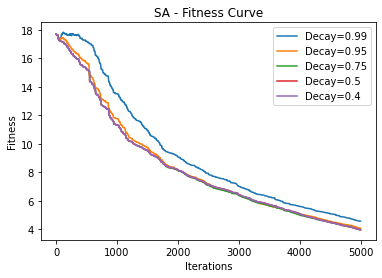

In [21]:
import matplotlib.pyplot as plt

results = None        
with open("SA.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("SA - Fitness Curve")
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")
for decay, stats in results.items():
    ax.plot(stats['curve'], label="Decay={}".format(decay))

plt.legend(loc="best")
plt.savefig("SA_Curve.png")



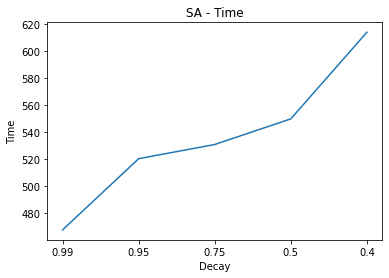

In [19]:
results = None        
with open("SA.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("SA - Time")
ax.set_xlabel("Decay")
ax.set_ylabel("Time")
decays = []
times = []
for decay, stats in results.items():
    decays.append(decay)
    times.append(stats['time'])    
ax.plot(decays, times)

plt.savefig("SA_Curve_time.png")

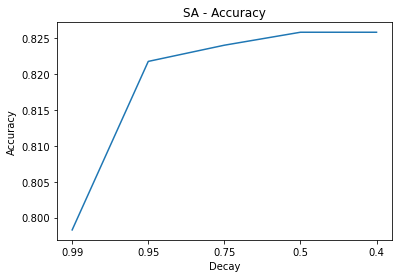

In [20]:
results = None        
with open("SA.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("SA - Accuracy")
ax.set_xlabel("Decay")
ax.set_ylabel("Accuracy")
decays = []
times = []
for decay, stats in results.items():
    decays.append(decay)
    times.append(stats['accuracy'])    
ax.plot(decays, times)

plt.savefig("SA_Curve_acc.png")

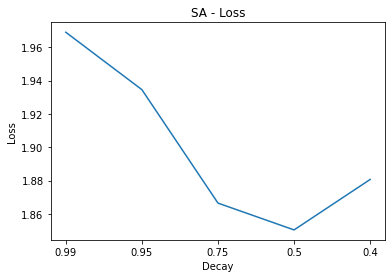

In [41]:
results = None        
with open("SA.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("SA - Loss")
ax.set_xlabel("Decay")
ax.set_ylabel("Loss")
decays = []
times = []
for decay, stats in results.items():
    decays.append(decay)
    times.append(stats['loss'])    
ax.plot(decays, times)

plt.savefig("SA_Curve_loss.png")